In [2]:
!pip install einops

  Using cached einops-0.7.0-py3-none-any.whl.metadata (13 kB)
Using cached einops-0.7.0-py3-none-any.whl (44 kB)


In [2]:
import numpy as np
from einops_master.docs.utils import display_np_arrays_as_images

In [3]:
display_np_arrays_as_images()

In [4]:
ims = np.load('einops_master/docs/resources/test_images.npy', allow_pickle=False)
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


In [5]:
import einops

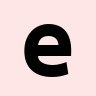

In [6]:
ims[0]

In [7]:
from einops import reduce, rearrange, repeat

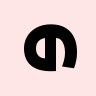

In [8]:
rearrange(ims[0], 'h w c -> w h c')

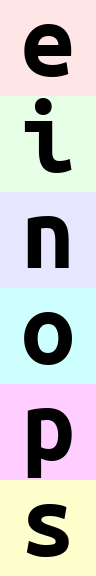

In [9]:
rearrange(ims, 'b h w c -> (b h) w c')

In [10]:
ims.shape, rearrange(ims, 'b h w c -> (b h) w c').shape, rearrange(ims, 'b h w c -> h (b w) c').shape

((6, 96, 96, 3), (576, 96, 3), (96, 576, 3))

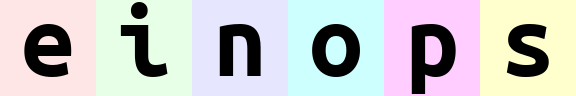

In [11]:
rearrange(ims, 'b h w c -> h (b w) c')

In [12]:
rearrange(ims, 'b h w c -> (b h w c)').shape

(165888,)

### Decomposition of axis

In [13]:
rearrange(ims,'(b1 b2)h w c -> b1 b2 h w c',b1=2)

<array of shape (2, 3, 96, 96, 3)>


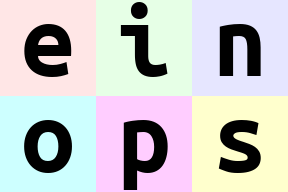

In [14]:
rearrange(ims,'(b1 b2)h w c -> (b1 h) (b2 w) c',b1=2)

In [15]:
rearrange(ims,'(b1 b2)h w c -> (b1 h) (b2 w) c',b1=2).shape

(192, 288, 3)

In [16]:
import torch
# What a 4x3x2x1 means is that we'll have 4 matrices of 3x2x1 shape, aka we'll have 4 matrices where each matrix contains 3 matrices of 2x1 shape
x = torch.rand(4,3,2,1)
x

tensor([[[[0.8632],
          [0.4039]],

         [[0.8905],
          [0.2918]],

         [[0.2863],
          [0.2222]]],


        [[[0.0478],
          [0.7637]],

         [[0.5673],
          [0.8469]],

         [[0.8766],
          [0.8439]]],


        [[[0.8553],
          [0.4874]],

         [[0.5948],
          [0.4438]],

         [[0.7642],
          [0.3504]]],


        [[[0.6679],
          [0.6927]],

         [[0.9708],
          [0.8881]],

         [[0.8990],
          [0.1260]]]])

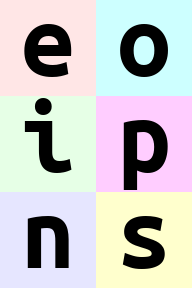

In [17]:
rearrange(ims,'(b1 b2)h w c -> (b2 h) (b1 w) c',b1=2)

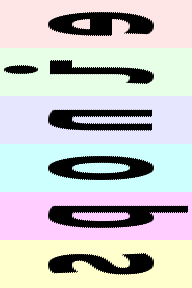

In [18]:
rearrange(ims,'b h (w1 w2) c -> (b w1) (h w2) c',w1=48)

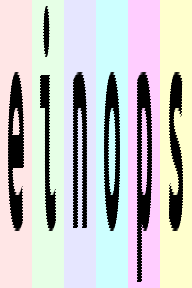

In [19]:
rearrange(ims, 'b h (w1 w2) c -> (h w2) (b w1) c',w2=3)

### Order of axes matters

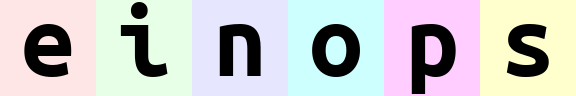

In [20]:
rearrange(ims, 'b h w c -> h (b w) c')

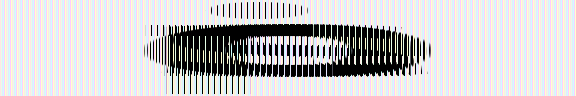

In [21]:
rearrange(ims, 'b h w c -> h (w b) c')

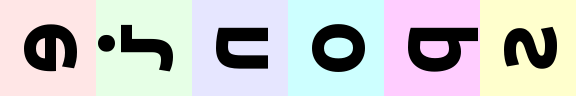

In [26]:
rearrange(ims, 'b h w c -> w (b h) c')

### einops.reduce

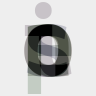

In [32]:
reduce(ims, 'b h w c -> h w c', 'mean')

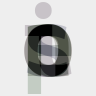

In [35]:
ims.mean(0)

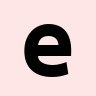

In [43]:
ims[0]

In grayscale images with pixel values 0 to 255, 0 means black and 255 means white.

If there's X images in a batch and Y channels per image, then when we use mean/min/max operations, for each pixel value, X*Y values are used (obtained from all channels and all images in the batch)to determine the mean or min or max for that pixel.

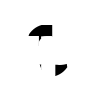

In [47]:
## The black spots are where all images have an intersection,
# so the max value would be close to min
reduce(ims, 'b h w c -> h w','max')

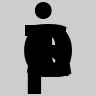

In [48]:
reduce(ims, 'b h w c -> h w','min')

In [ ]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c','mean',h2=2,w2=2)